In [3]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [4]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [5]:
NUM_CLASSES = 6

# Dataset reading

In [6]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [7]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [10]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [12]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [13]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
22/35 [=================>............] - ETA: 0s - loss: 1.8755 - accuracy: 0.1680 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 1s 11ms/step - loss: 1.8389 - accuracy: 0.1884 - val_loss: 1.7137 - val_accuracy: 0.3625
Epoch 2/1000
17/35 [=============>................] - ETA: 0s - loss: 1.7238 - accuracy: 0.2597
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 5ms/step - loss: 1.7019 - accuracy: 0.2733 - val_loss: 1.6185 - val_accuracy: 0.3638
Epoch 3/1000
22/35 [=================>............] - ETA: 0s - loss: 1.6477 - accuracy: 0.3029
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 5ms/step - loss: 1.6359 - accuracy: 0.3100 - val_loss: 1.5460 - val_accuracy: 0.3809
Epoch 4/1000
20/35 [================>.............] - ETA: 0s - loss: 1.5934 - accuracy: 0.3215

19/35 [===============>..............] - ETA: 0s - loss: 0.9224 - accuracy: 0.6435
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 6ms/step - loss: 0.9193 - accuracy: 0.6434 - val_loss: 0.5493 - val_accuracy: 0.9017
Epoch 29/1000
18/35 [==============>...............] - ETA: 0s - loss: 0.9039 - accuracy: 0.6484
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 6ms/step - loss: 0.9154 - accuracy: 0.6425 - val_loss: 0.5402 - val_accuracy: 0.9051
Epoch 30/1000
34/35 [============================>.] - ETA: 0s - loss: 0.9000 - accuracy: 0.6549
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 6ms/step - loss: 0.8995 - accuracy: 0.6550 - val_loss: 0.5315 - val_accuracy: 0.9017
Epoch 31/1000
18/35 [==============>...............] - ETA: 0s - loss: 0.8816 - accuracy: 0.6589
Epoch 31

24/35 [===================>..........] - ETA: 0s - loss: 0.8024 - accuracy: 0.7044
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 5ms/step - loss: 0.7751 - accuracy: 0.7110 - val_loss: 0.3998 - val_accuracy: 0.9290
Epoch 56/1000
33/35 [===========================>..] - ETA: 0s - loss: 0.7883 - accuracy: 0.7010
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 6ms/step - loss: 0.7855 - accuracy: 0.7012 - val_loss: 0.4008 - val_accuracy: 0.9338
Epoch 57/1000
22/35 [=================>............] - ETA: 0s - loss: 0.7616 - accuracy: 0.7152
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 5ms/step - loss: 0.7799 - accuracy: 0.7082 - val_loss: 0.3982 - val_accuracy: 0.9235
Epoch 58/1000
18/35 [==============>...............] - ETA: 0s - loss: 0.7891 - accuracy: 0.7118
Epoch 58

22/35 [=================>............] - ETA: 0s - loss: 0.7331 - accuracy: 0.7262
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 5ms/step - loss: 0.7314 - accuracy: 0.7278 - val_loss: 0.3589 - val_accuracy: 0.9372
Epoch 83/1000
20/35 [================>.............] - ETA: 0s - loss: 0.7076 - accuracy: 0.7391
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 6ms/step - loss: 0.7165 - accuracy: 0.7387 - val_loss: 0.3445 - val_accuracy: 0.9290
Epoch 84/1000
20/35 [================>.............] - ETA: 0s - loss: 0.7626 - accuracy: 0.7203
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 6ms/step - loss: 0.7392 - accuracy: 0.7326 - val_loss: 0.3522 - val_accuracy: 0.9311
Epoch 85/1000
19/35 [===============>..............] - ETA: 0s - loss: 0.7457 - accuracy: 0.7274
Epoch 85

22/35 [=================>............] - ETA: 0s - loss: 0.7272 - accuracy: 0.7262
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 4ms/step - loss: 0.7076 - accuracy: 0.7387 - val_loss: 0.3340 - val_accuracy: 0.9338
Epoch 110/1000
22/35 [=================>............] - ETA: 0s - loss: 0.7092 - accuracy: 0.7436
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 4ms/step - loss: 0.7110 - accuracy: 0.7447 - val_loss: 0.3272 - val_accuracy: 0.9372
Epoch 111/1000
19/35 [===============>..............] - ETA: 0s - loss: 0.7053 - accuracy: 0.7467
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 6ms/step - loss: 0.7007 - accuracy: 0.7483 - val_loss: 0.3276 - val_accuracy: 0.9372
Epoch 112/1000
35/35 [==============================] - ETA: 0s - loss: 0.7009 - accuracy: 0.7401
Ep

Epoch 136/1000
23/35 [==================>...........] - ETA: 0s - loss: 0.7000 - accuracy: 0.7422
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 5ms/step - loss: 0.6879 - accuracy: 0.7458 - val_loss: 0.3185 - val_accuracy: 0.9515
Epoch 137/1000
19/35 [===============>..............] - ETA: 0s - loss: 0.7036 - accuracy: 0.7488
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 6ms/step - loss: 0.7020 - accuracy: 0.7501 - val_loss: 0.3243 - val_accuracy: 0.9413
Epoch 138/1000
21/35 [=================>............] - ETA: 0s - loss: 0.6845 - accuracy: 0.7522
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.7474 - val_loss: 0.3189 - val_accuracy: 0.9447
Epoch 139/1000
19/35 [===============>..............] - ETA: 0s - loss: 0.7020 - accu

Epoch 163/1000
18/35 [==============>...............] - ETA: 0s - loss: 0.6817 - accuracy: 0.7522
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 5ms/step - loss: 0.6783 - accuracy: 0.7551 - val_loss: 0.3137 - val_accuracy: 0.9488
Epoch 164/1000
31/35 [=========================>....] - ETA: 0s - loss: 0.6953 - accuracy: 0.7399
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.7401 - val_loss: 0.3260 - val_accuracy: 0.9474
Epoch 165/1000
29/35 [=======================>......] - ETA: 0s - loss: 0.6722 - accuracy: 0.7616
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
35/35 [==============================] - 0s 3ms/step - loss: 0.6715 - accuracy: 0.7597 - val_loss: 0.3149 - val_accuracy: 0.9433
Epoch 166/1000
30/35 [========================>.....] - ETA: 0s - loss: 0.6682 - accu

In [14]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 [==============================] - 0s 2ms/step - loss: 0.3102 - accuracy: 0.9420


In [15]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [16]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 82ms/step
[5.2095181e-01 6.5894648e-02 3.0208068e-04 4.1188362e-01 7.5556408e-04
 2.1223161e-04]
0


# Confusion matrix

46/46 [==============================] - 0s 1ms/step


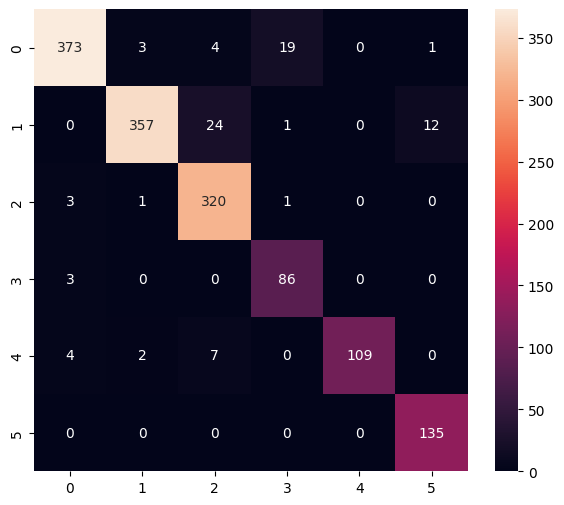

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       400
           1       0.98      0.91      0.94       394
           2       0.90      0.98      0.94       325
           3       0.80      0.97      0.88        89
           4       1.00      0.89      0.94       122
           5       0.91      1.00      0.95       135

    accuracy                           0.94      1465
   macro avg       0.93      0.95      0.94      1465
weighted avg       0.95      0.94      0.94      1465



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [18]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [19]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\91799\AppData\Local\Temp\tmp039bm91r\assets


INFO:tensorflow:Assets written to: C:\Users\91799\AppData\Local\Temp\tmp039bm91r\assets


6632

# Inference test

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [21]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.2095181e-01 6.5894663e-02 3.0208065e-04 4.1188371e-01 7.5556443e-04
 2.1223139e-04]
0
